<a href="https://colab.research.google.com/github/mo-nathan/mo-ml/blob/main/ml_for_mo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushroom Image Classifier

In [ ]:
from pathlib import Path
from fastai.vision.all import *
import tarfile
from google.colab import drive

RUN_NAME = '2_2023-02-04-225517'
TGZ_NAME = RUN_NAME + '.tgz'
MO_URL = "https://images.mushroomobserver.org/" + TGZ_NAME

def load_from_url():
  return untar_data(MO_URL)

def load_from_drive():
  drive.mount('/content/drive')
  tgz_path = Path('/content/drive/MyDrive/', TGZ_NAME)
  path = Path('/root/mo/data/')
  tarfile.open(tgz_path, 'r:gz').extractall(path)
  return path


Load TGZ from MO URL

In [ ]:
path = load_from_url()
path

Path('/root/.fastai/data/2_2023-02-04-225517')

Load TGZ from Drive

In [ ]:
path = load_from_drive()
path

Mounted at /content/drive


Path('/root/mo/data')

Create Data Loaders

In [ ]:
def label_func(x):
    dirname = x.parent.name
    return dirname

fnames = get_image_files(path)
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls.vocab

['Amanita amerirubescens', 'Amanita lavendula', 'Amanita pantherina', 'Clitocybe nuda', 'Fungi', 'Galerina marginata', 'Phaeolus schweinitzii', 'Pleurotus ostreatus', 'Pluteus cervinus', 'Russula xerampelina', 'Trametes versicolor']

Show Me Some Mushrooms

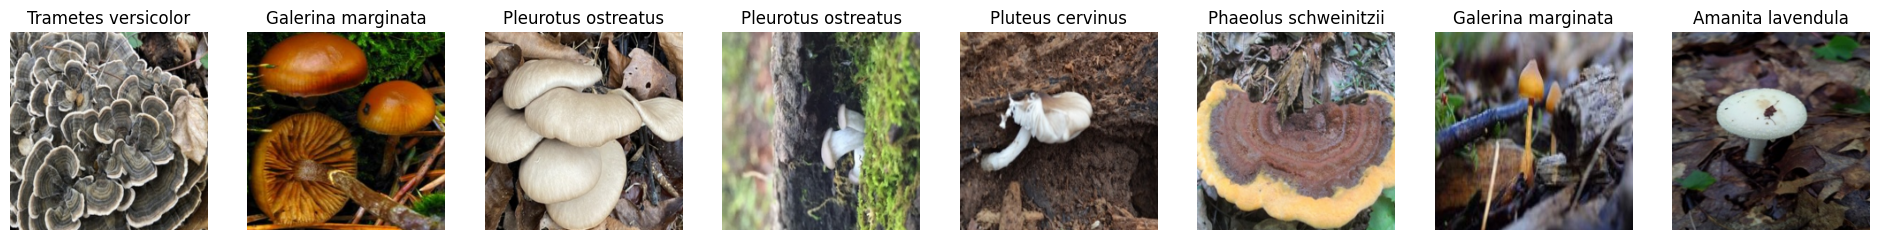

In [ ]:
dls.valid.show_batch(max_n=8, nrows=1)

Do Some Training

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 226MB/s]


How Confused Are We?

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused()

[('Fungi', 'Trametes versicolor', 20),
 ('Pluteus cervinus', 'Pleurotus ostreatus', 20),
 ('Fungi', 'Galerina marginata', 15),
 ('Fungi', 'Pleurotus ostreatus', 15),
 ('Trametes versicolor', 'Pleurotus ostreatus', 14),
 ('Pluteus cervinus', 'Galerina marginata', 13),
 ('Trametes versicolor', 'Fungi', 11),
 ('Fungi', 'Phaeolus schweinitzii', 10),
 ('Pleurotus ostreatus', 'Trametes versicolor', 10),
 ('Pluteus cervinus', 'Fungi', 10),
 ('Phaeolus schweinitzii', 'Trametes versicolor', 9),
 ('Clitocybe nuda', 'Pluteus cervinus', 8),
 ('Galerina marginata', 'Fungi', 8),
 ('Trametes versicolor', 'Phaeolus schweinitzii', 8),
 ('Amanita amerirubescens', 'Pluteus cervinus', 7),
 ('Clitocybe nuda', 'Pleurotus ostreatus', 7),
 ('Fungi', 'Amanita lavendula', 6),
 ('Phaeolus schweinitzii', 'Pleurotus ostreatus', 6),
 ('Pluteus cervinus', 'Clitocybe nuda', 6),
 ('Amanita amerirubescens', 'Amanita lavendula', 5),
 ('Amanita amerirubescens', 'Fungi', 5),
 ('Amanita pantherina', 'Amanita lavendula', 5)

Let's Plot Our Confusion

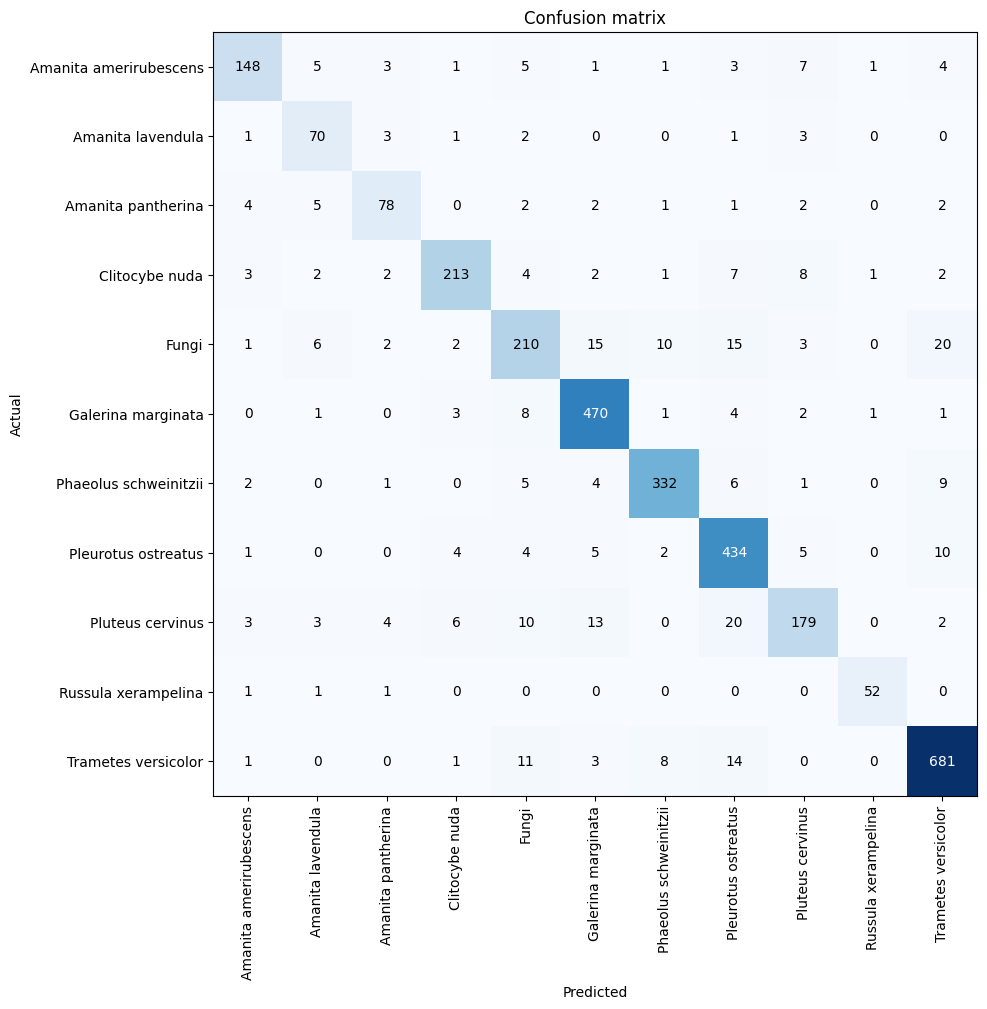

In [ ]:
interp.plot_confusion_matrix(figsize=(10, 10))

Let's Consider Our Losses

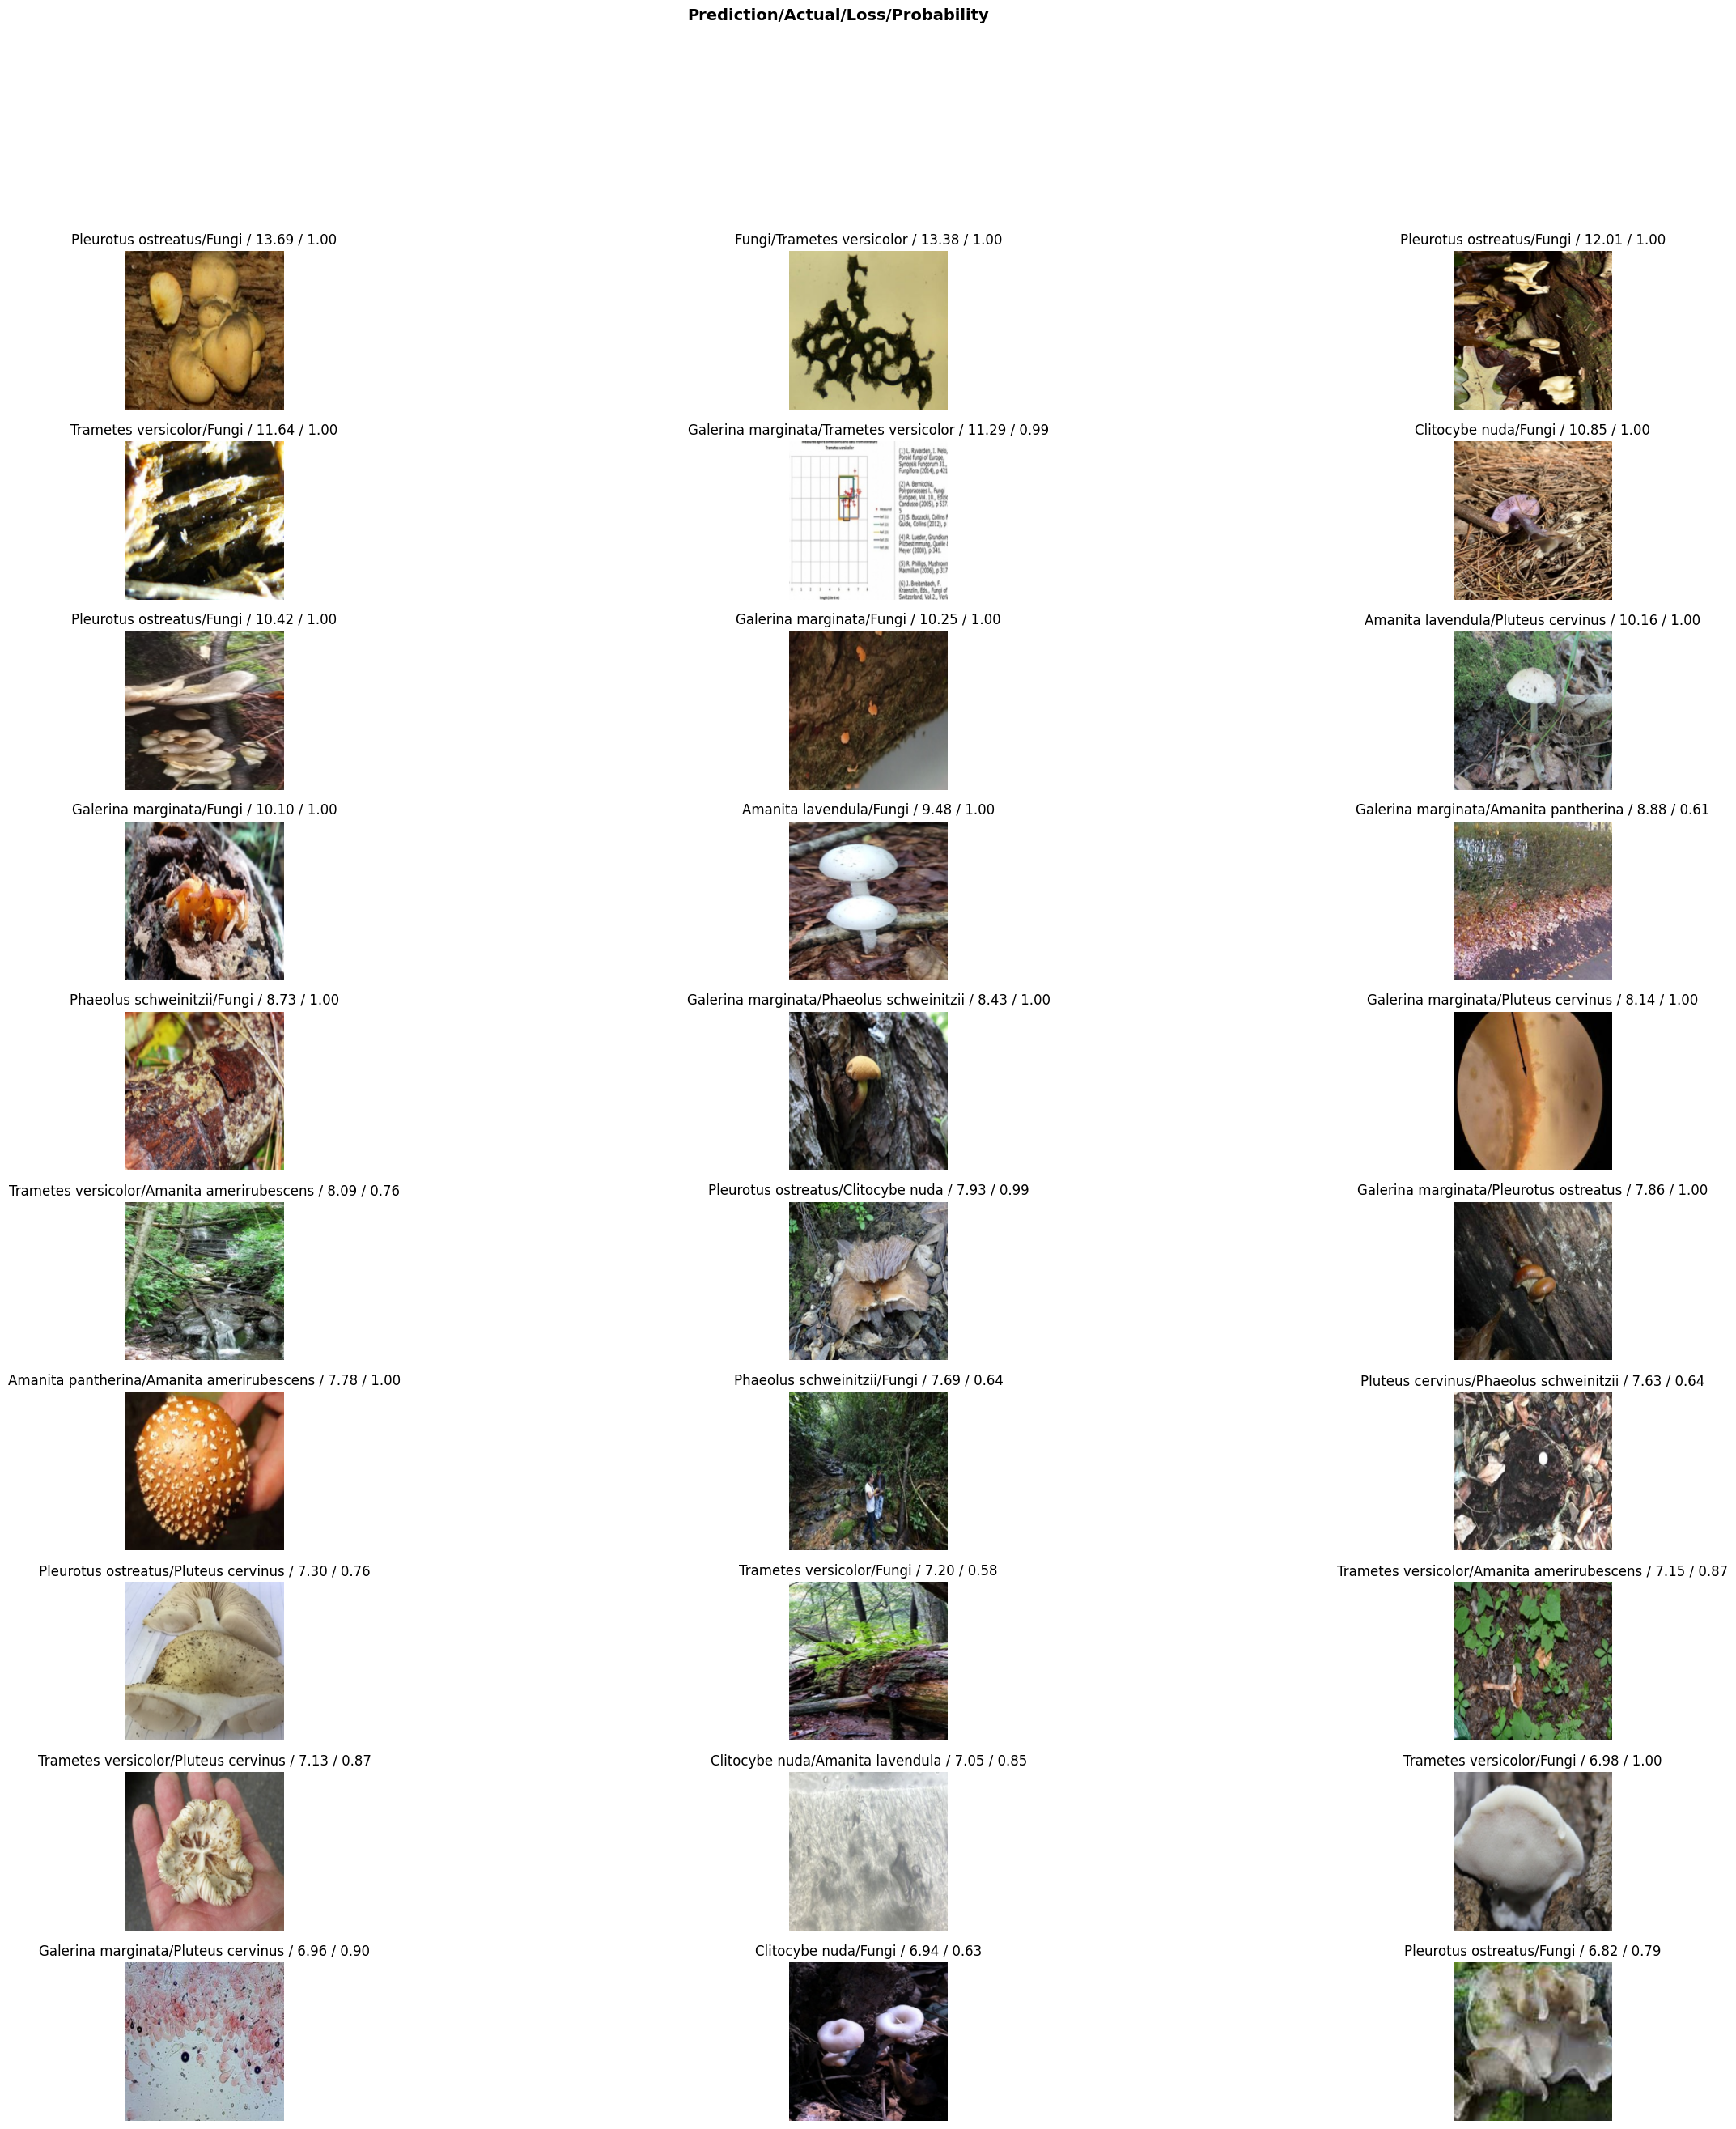

In [ ]:
interp.plot_top_losses(30, nrows=10, figsize=(30, 30))

Save The Model to Google Drive

In [9]:
model_path = learn.save(RUN_NAME)
drive.mount('/content/drive')
!cp $model_path /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Would Care To Pickle That?

In [13]:
learn.export()
export_path = learn.path / 'export.pkl'
target_path = '/content/drive/MyDrive/' + RUN_NAME + '.pkl'
!cp $export_path $target_path